In [151]:
import pandas as pd
import numpy as np
import missingno as msno

# Load Dataset

In [152]:
product = pd.read_csv('product.csv')
product

,Product,Weight (kg),Color,Price,MadeInBhutan,ExpiryDate
0,A,1.20,Blue,10,1,28/2/2022
1,B,NaN,Black,12$,0,15/3/2022
2,C,2.00,blue,15,0,8/10/2023
3,D,0.50,Purple,4,1,38/01/2022
4,E,3.00,White,12,1,13/1/2022
5,F,2.00,Yellow,NaN,0,30/15/2021
6,G,NaN,BLUE,NaN,0,06/21/2021
7,H,0.75,Cyan,5$,1,14/1/2024


In [153]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       8 non-null      object 
 1   Weight (kg)   6 non-null      float64
 2   Color         8 non-null      object 
 3   Price         6 non-null      object 
 4   MadeInBhutan  8 non-null      int64  
 5   ExpiryDate    8 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 512.0+ bytes


<AxesSubplot:>

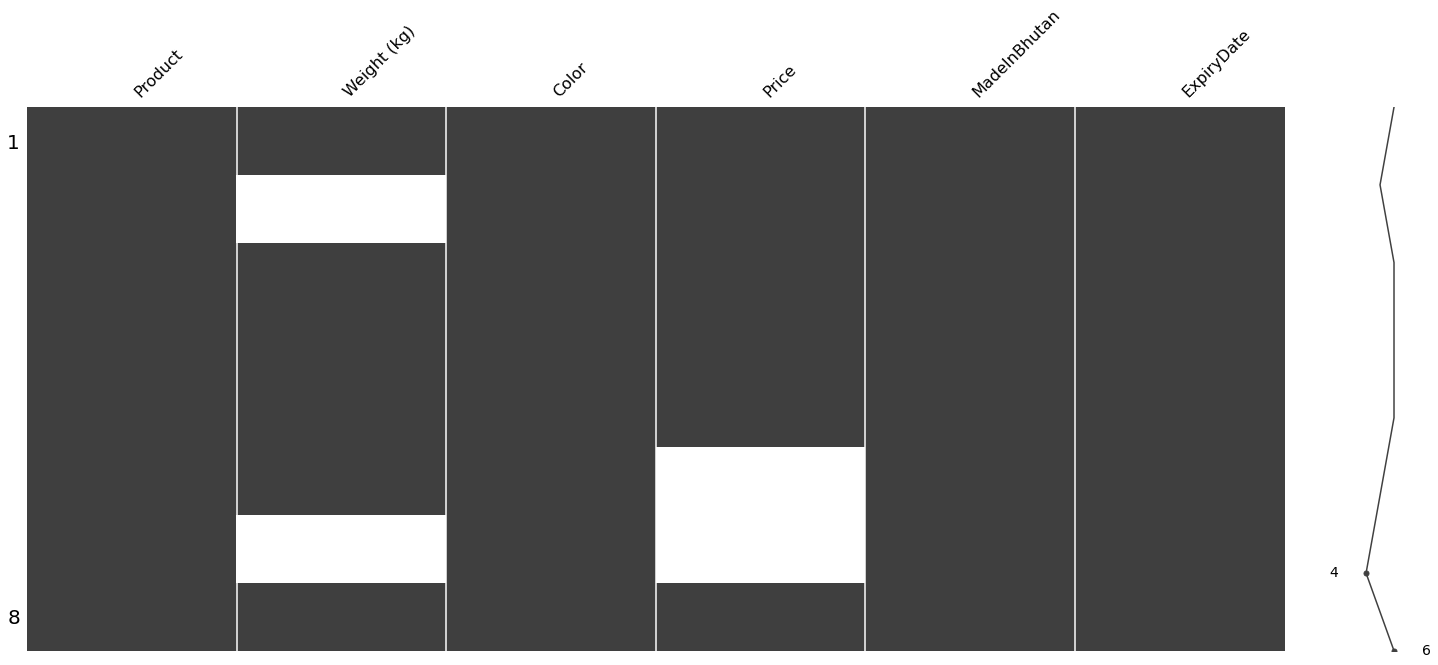

In [155]:
# product.isnull().sum()
msno.matrix(product)

In [156]:
product['Weight (kg)']

0    1.20
1     NaN
2    2.00
3    0.50
4    3.00
5    2.00
6     NaN
7    0.75
Name: Weight (kg), dtype: float64

In [158]:
#Renaming the weight (kg) column to weight for the convinience

product.rename(columns={'Weight (kg)':'weight'}, inplace=True)
product

,Product,weight,Color,Price,MadeInBhutan,ExpiryDate
0,A,1.20,Blue,10,1,28/2/2022
1,B,NaN,Black,12$,0,15/3/2022
2,C,2.00,blue,15,0,8/10/2023
3,D,0.50,Purple,4,1,38/01/2022
4,E,3.00,White,12,1,13/1/2022
5,F,2.00,Yellow,NaN,0,30/15/2021
6,G,NaN,BLUE,NaN,0,06/21/2021
7,H,0.75,Cyan,5$,1,14/1/2024


In [160]:
# Let's impute missing values in the 'weight' column, say by the mean, just for illustration.

avg = product['weight'].mean()
product['weight'].fillna(avg, inplace=True)
product

,Product,weight,Color,Price,MadeInBhutan,ExpiryDate
0,A,1.200,Blue,10,1,28/2/2022
1,B,1.575,Black,12$,0,15/3/2022
2,C,2.000,blue,15,0,8/10/2023
3,D,0.500,Purple,4,1,38/01/2022
4,E,3.000,White,12,1,13/1/2022
5,F,2.000,Yellow,NaN,0,30/15/2021
6,G,1.575,BLUE,NaN,0,06/21/2021
7,H,0.750,Cyan,5$,1,14/1/2024


In [161]:
product.dtypes   #where the color column must be a datatype of category

Product          object
weight          float64
Color            object
Price            object
MadeInBhutan      int64
ExpiryDate       object
dtype: object

In [202]:
product['Color'] = product['Color'].astype('category') #Converted the color to categorical data type. 


In [203]:
# assert  product['Color'].dtype == 'category' # we can verify. If true, no output.
# product.info()
product.dtypes

Product           object
weight           float64
Color           category
Price             object
MadeInBhutan       int64
ExpiryDate        object
dtype: object

In [205]:
# Filter all blue-colored items 
# product [ product['Color'] == 'Blue']
product[(product['Color'] =='Blue') | (product['Color'] == 'blue') | (product['Color'] == 'BLUE')] #if we want to have both the category type of 'blue' and 'Blue'

,Product,weight,Color,Price,MadeInBhutan,ExpiryDate
0,A,1.200,blue,10,1,28/2/2022
2,C,2.000,blue,15,0,8/10/2023
6,G,1.575,blue,NaN,0,06/21/2021


In [206]:
# Let's change cases 

product['Color'] = product['Color'].str.lower()  #or #lower
product

,Product,weight,Color,Price,MadeInBhutan,ExpiryDate
0,A,1.200,blue,10,1,28/2/2022
1,B,1.575,black,12$,0,15/3/2022
2,C,2.000,blue,15,0,8/10/2023
3,D,0.500,purple,4,1,38/01/2022
4,E,3.000,white,12,1,13/1/2022
5,F,2.000,yellow,NaN,0,30/15/2021
6,G,1.575,blue,NaN,0,06/21/2021
7,H,0.750,cyan,5$,1,14/1/2024


In [209]:
product['Color'] = product['Color'].astype('category') 
# again Converted the color to categorical data type.  Since the data type get change upon lower casing.

# The Price column 


In [207]:
# -Datatype issue

# -Format inconsistency

# -Few missing values

In [211]:
# product.dtypes
# product

,Product,weight,Color,Price,MadeInBhutan,ExpiryDate
0,A,1.200,blue,10,1,28/2/2022
1,B,1.575,black,12$,0,15/3/2022
2,C,2.000,blue,15,0,8/10/2023
3,D,0.500,purple,4,1,38/01/2022
4,E,3.000,white,12,1,13/1/2022
5,F,2.000,yellow,NaN,0,30/15/2021
6,G,1.575,blue,NaN,0,06/21/2021
7,H,0.750,cyan,5$,1,14/1/2024


In [212]:
# Let us get rid of the $. The strip() does the job.  

product['Price'] = product['Price'].str.strip('$')

product

,Product,weight,Color,Price,MadeInBhutan,ExpiryDate
0,A,1.200,blue,10,1,28/2/2022
1,B,1.575,black,12,0,15/3/2022
2,C,2.000,blue,15,0,8/10/2023
3,D,0.500,purple,4,1,38/01/2022
4,E,3.000,white,12,1,13/1/2022
5,F,2.000,yellow,NaN,0,30/15/2021
6,G,1.575,blue,NaN,0,06/21/2021
7,H,0.750,cyan,5,1,14/1/2024


In [213]:
product['Price'] = product['Price'].astype('float') #converting to float data type.
product

,Product,weight,Color,Price,MadeInBhutan,ExpiryDate
0,A,1.200,blue,10.0,1,28/2/2022
1,B,1.575,black,12.0,0,15/3/2022
2,C,2.000,blue,15.0,0,8/10/2023
3,D,0.500,purple,4.0,1,38/01/2022
4,E,3.000,white,12.0,1,13/1/2022
5,F,2.000,yellow,NaN,0,30/15/2021
6,G,1.575,blue,NaN,0,06/21/2021
7,H,0.750,cyan,5.0,1,14/1/2024


In [214]:
product['Price'].dtypes

dtype('float64')

In [215]:

aveg = product['Price'].mean()
product['Price'].fillna(aveg, inplace=True) #filling up all the missing data in Price
product

,Product,weight,Color,Price,MadeInBhutan,ExpiryDate
0,A,1.200,blue,10.000000,1,28/2/2022
1,B,1.575,black,12.000000,0,15/3/2022
2,C,2.000,blue,15.000000,0,8/10/2023
3,D,0.500,purple,4.000000,1,38/01/2022
4,E,3.000,white,12.000000,1,13/1/2022
5,F,2.000,yellow,9.666667,0,30/15/2021
6,G,1.575,blue,9.666667,0,06/21/2021
7,H,0.750,cyan,5.000000,1,14/1/2024


# The MadeInBhutan column

In [216]:
#Type issue (int64)

product.describe()       # notice the MadeInBhutan's output. Any sense? 

,weight,Price,MadeInBhutan
count,8.000000,8.000000,8.000000
mean,1.575000,9.666667,0.500000
std,0.790005,3.651484,0.534522
min,0.500000,4.000000,0.000000
25%,1.087500,8.500000,0.000000
50%,1.575000,9.833333,0.500000
75%,2.000000,12.000000,1.000000
max,3.000000,15.000000,1.000000


In [217]:
# Let's convert it to categorical data: 1 actually is for "Yes", 0 for "no"

product['MadeInBhutan'] = product['MadeInBhutan'].astype('category') 

In [218]:
# product.describe()
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Product       8 non-null      object  
 1   weight        8 non-null      float64 
 2   Color         8 non-null      category
 3   Price         8 non-null      float64 
 4   MadeInBhutan  8 non-null      category
 5   ExpiryDate    8 non-null      object  
dtypes: category(2), float64(2), object(2)
memory usage: 744.0+ bytes


# The ExpiryDate column

In [219]:
product['ExpiryDate'].dtypes

dtype('O')

In [220]:
# Let's parse it as datetime. Using the to_datetime() method of Pandas. 
# For more, see pandas.pydata.org/docs/reference/api/pandas.to_datetime.html#pandas.to_datetime


product['ExpiryDate'] = pd.to_datetime(product['ExpiryDate'], format="%d/%m/%Y", errors='coerce') 

In [221]:
# product.dtypes
product

,Product,weight,Color,Price,MadeInBhutan,ExpiryDate
0,A,1.200,blue,10.000000,1,2022-02-28
1,B,1.575,black,12.000000,0,2022-03-15
2,C,2.000,blue,15.000000,0,2023-10-08
3,D,0.500,purple,4.000000,1,NaT
4,E,3.000,white,12.000000,1,2022-01-13
5,F,2.000,yellow,9.666667,0,NaT
6,G,1.575,blue,9.666667,0,NaT
7,H,0.750,cyan,5.000000,1,2024-01-14


In [222]:
#To replace NaT into a proper date using pandas
product['ExpiryDate'].fillna(value=pd.to_datetime('2022-04-29'), inplace=True) 

In [229]:
product.dtypes

Product                 object
weight                 float64
Color                 category
Price                  float64
MadeInBhutan          category
ExpiryDate      datetime64[ns]
dtype: object

In [232]:
product.to_csv("product_processed.csv")

In [233]:
p = pd.read_csv('product_processed.csv')


In [236]:
p

,Unnamed: 0,Product,weight,Color,Price,MadeInBhutan,ExpiryDate
0,0,A,1.200,blue,10.000000,1,2022-02-28
1,1,B,1.575,black,12.000000,0,2022-03-15
2,2,C,2.000,blue,15.000000,0,2023-10-08
3,3,D,0.500,purple,4.000000,1,2022-04-29
4,4,E,3.000,white,12.000000,1,2022-01-13
5,5,F,2.000,yellow,9.666667,0,2022-04-29
6,6,G,1.575,blue,9.666667,0,2022-04-29
7,7,H,0.750,cyan,5.000000,1,2024-01-14


In [250]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       8 non-null      object 
 1   weight        8 non-null      float64
 2   Color         8 non-null      object 
 3   Price         8 non-null      float64
 4   MadeInBhutan  8 non-null      int64  
 5   ExpiryDate    8 non-null      object 
dtypes: float64(2), int64(1), object(3)
memory usage: 512.0+ bytes


In [251]:
p

,Product,weight,Color,Price,MadeInBhutan,ExpiryDate
0,A,1.200,blue,10.000000,1,2022-02-28
1,B,1.575,black,12.000000,0,2022-03-15
2,C,2.000,blue,15.000000,0,2023-10-08
3,D,0.500,purple,4.000000,1,2022-04-29
4,E,3.000,white,12.000000,1,2022-01-13
5,F,2.000,yellow,9.666667,0,2022-04-29
6,G,1.575,blue,9.666667,0,2022-04-29
7,H,0.750,cyan,5.000000,1,2024-01-14


# finally the cleaned data

In [252]:
p.to_csv('CleanData.csv')

In [270]:
prd = pd.read_csv('CleanData.csv')
prd

,Unnamed: 0,Product,weight,Color,Price,MadeInBhutan,ExpiryDate
0,0,A,1.200,blue,10.000000,1,2022-02-28
1,1,B,1.575,black,12.000000,0,2022-03-15
2,2,C,2.000,blue,15.000000,0,2023-10-08
3,3,D,0.500,purple,4.000000,1,2022-04-29
4,4,E,3.000,white,12.000000,1,2022-01-13
5,5,F,2.000,yellow,9.666667,0,2022-04-29
6,6,G,1.575,blue,9.666667,0,2022-04-29
7,7,H,0.750,cyan,5.000000,1,2024-01-14


In [271]:
prd.pop('Unnamed: 0')

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
Name: Unnamed: 0, dtype: int64

In [272]:
prd

,Product,weight,Color,Price,MadeInBhutan,ExpiryDate
0,A,1.200,blue,10.000000,1,2022-02-28
1,B,1.575,black,12.000000,0,2022-03-15
2,C,2.000,blue,15.000000,0,2023-10-08
3,D,0.500,purple,4.000000,1,2022-04-29
4,E,3.000,white,12.000000,1,2022-01-13
5,F,2.000,yellow,9.666667,0,2022-04-29
6,G,1.575,blue,9.666667,0,2022-04-29
7,H,0.750,cyan,5.000000,1,2024-01-14
